<a href="https://colab.research.google.com/github/Jowayria-27/Artifical-Intelligence-Project/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Artificial Intelligence Project**


##Neural Network: ANN

In this project, we are aiming to predict customer churn, which means we are trying to predict which customer would unsubscribe from the service and leave the company. It is extremely crucial to be able to know what factors cause consumers to churn, so that firms work on reducing that factors and maintain and retain their customers. Losing customers lead to several consquences including loss of profit, loss of reputation, and a decrease in sales. In addition to that, it costs more money for banks to advertise and for making new clients than keeping existing clients, so it is extremely important for business to develop ways to encourage clients to stay through retention and loyalty programs. Finding factors of what makes clients leave is a crucial step in developing such programs.

 Hence, businesses nowadays are attempting to train machines to know what factors are increasing customer churn. Other companies attempt to know which factors decrease customer churn, so that they can create retention campaigns.

Link: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

We chose this dataset for several reasons:
1. It has 10,000 rows which is a good amount for training
2. The banking industry is one of the most industries that pays attention to churn rates
3. It has people from different countries compared to other datasets which allows us to be able to train the machine to know how different demographics affect churn rate
4. It has several good attributes including card type, points, and satisfaction scores which might give the machine more features to train on and learn from

NOTE: If this notebook is going to be run, you will have to select the kaggle.json file that is there in the project folder.

---



## **First Step: Data Exploration Analysis**


We will let the code read the CSV and explore the dataset through the Kaggle API

First of all, we will import all the libraries needed

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import statistics as s

%matplotlib inline
sns.set()

Then, we will use pip to install the kaggle library and upload the Kaggle API

In [ ]:
!pip install Kaggle

In [ ]:
files.upload()

{}

Next, we will create a directory named Kaggle and copy this file into this new directory

In [ ]:
import os

os.makedirs('/root/.kaggle/', exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


Finally, we will now download the dataset from Kaggle

In [ ]:
!kaggle datasets download -d radheshyamkollipara/bank-customer-churn

Dataset URL: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn
License(s): other
bank-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


Next, we will unzip the dataset

In [ ]:
!unzip /content/bank-customer-churn.zip -d /content/

Archive:  /content/bank-customer-churn.zip
replace /content/Customer-Churn-Records.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/Customer-Churn-Records.csv  


Finally, we will read the data

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Customer-Churn-Records.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


Next, we will start with exploring the data for any missing values. Based on the data shown below, there are 10,000 rows and 18 columns. Fortunately, there are no missing data in each of the columns.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
for i in df.columns:
    if df[i].dtype == 'object' or df[i].nunique() < 10:  # Categorical check (e.g., strings or few unique values)
        print(f"{i}: {df[i].unique()}")
    else:  # Numeric check
        print(f"{i}: Min = {df[i].min()}, Max = {df[i].max()}")

RowNumber: Min = 1, Max = 10000
CustomerId: Min = 15565701, Max = 15815690
Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore: Min = 350, Max = 850
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']
Age: Min = 18, Max = 92
Tenure: Min = 0, Max = 10
Balance: Min = 0.0, Max = 250898.09
NumOfProducts: [1 3 2 4]
HasCrCard: [1 0]
IsActiveMember: [1 0]
EstimatedSalary: Min = 11.58, Max = 199992.48
Exited: [1 0]
Complain: [1 0]
Satisfaction Score: [2 3 5 4 1]
Card Type: ['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']
Point Earned: Min = 119, Max = 1000


Each Column reprsents a different thing concerning the stock:
1. Row Number: It just describes where the row is positioned in the dataset
2. Customer ID: it uniquely represents the customers in the dataset through a number
3. Surname: the last name of the customer
4. Credit_Score: It is a number that represents the customer's ability and reliability to return money he/she borrows. The higher the number, the more likely a person would be trusted by the bank to borrow money. The lowest range is 350-649 and that is poor so loans would be less likely to be approved while the highest is 750-850 which is the excellent category and can easily be borrowed
5. Geography: Which country the customer is from. This dataset has customers mainly from France, Spain, and Germany
6. Gender: The gender of the customer which is either male or female
7. Age: the age of customers. Ages range from 18 to 92
8. Tenure: duration of the customer having the credit card and how long he/she has been using it in years. The customer that stayed the longest stayed for 10 years
9. Balance: how much the customer has in their bank account in Euros. The most a customer has owned was 250,898 Euros
10. NumofProducts: The number of products the user has bought with their bank account service
11. HasCrcard: if customer owns a credit card or not
12. IsActiveMember: Whether the person has been actively and recently using services
13. Estimated Salary: the customer's annual income
14. Exited: if the customer churned/ unsubscribed from the bank
15. Complain: if the customer has filed a complaint against the bank before or not
16. Satisfaction Score: It is a rating of 1-5 of how satisfied the customer is with the service. 1 being unsatisfed and 5 being satisfied
17. Card Type: What card type the user holds and there are 4 types: Diamond, Gold, Silver and Platinum. Diamond being for the most exclusive and important customers and Silver being for regular customers
18. Point Earned: The total amount of reward points the customer has collected through using the card. The highest points earend was 1000.

Next, we will see the counts in order to know more facts about the dataset before cleaning

In [ ]:
for column in df.columns:
    print(f"{column} : {df[column].value_counts()}")
    print("====================================")


RowNumber : RowNumber
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64
CustomerId : CustomerId
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: count, Length: 10000, dtype: int64
Surname : Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64
CreditScore : CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64
Geography : Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender : Gender
Male      5457
Female    4543
Name: count, dtype: int64
Age : Age
37    478


In [ ]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

RowNumber: Number of unique values 10000
CustomerId: Number of unique values 10000
Surname: Number of unique values 2932
CreditScore: Number of unique values 460
Geography: Number of unique values 3
Gender: Number of unique values 2
Age: Number of unique values 70
Tenure: Number of unique values 11
Balance: Number of unique values 6382
NumOfProducts: Number of unique values 4
HasCrCard: Number of unique values 2
IsActiveMember: Number of unique values 2
EstimatedSalary: Number of unique values 9999
Exited: Number of unique values 2
Complain: Number of unique values 2
Satisfaction Score: Number of unique values 5
Card Type: Number of unique values 4
Point Earned: Number of unique values 785


The following observations:
1. Almost have of the bank clients are from France while 1/4 are from Germany and the other half is from Spain
2. Satisfaction score distribution are almost equal
3. 54% of the dataset consists of males
4. While the differences in amounts of people who own each type of card are slight, 2507 have diamond, 2502 have Gold, 2095 have platinum, and 2094 have silver cards
5. More than half the clients bought only one product using their card while 45% of clients bought two items. Very few clients bought 3 and 4 products
6. 51% of the clients are active members and frequently use their cards while 49% have not been as active
7. 20% of clients have filed a compliant
8. Most clients are in their 30s

Next, we are going to find the frequency, mode, mean, median, and other statistics of the data using describe

In [ ]:
df.describe(include="all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIAMOND,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2507,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,NaN,606.515100
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,NaN,225.924839
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,NaN,119.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,NaN,410.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,NaN,605.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,NaN,801.000000


Based on the data above, we can conclude the following:
1. Mean Credit Score is 650 while median is 652, so the credit score is almost normally distributed. 650 score is a fair score so majority of people are in the fair score
2. Half of the customers are from France
3. More than half this dataset is Male
4. Average Age of customers is between 37-38
5. The average and median of people had a 5 year tenure meaning that they stayed with the bank for 5 years
6. The mean balance customers have is 76485 Euros but the median is 97198 Euros meaning that distribution is left skewed meaning that there are some outliers that are small in value
7. Majority of people subscribed to one product
8. 70% of the people in this dataset has credit cards
9. Half of the people in this dataset are active members and have been recently using their cards
10. The average annual salary for all customers is 100,090 Euros
11. 20% of this dataset has churned
12. The average satisfaction score is 3
13. Only 20% of the customers have filed a complain
14. Almost 1/4th of the customrs have the diamond credit card type
15. The average points earned is 606 while median is 650


Next, we will drop all the unnecessary columns (rownumber, customerID, and surname) so we can prepare our data

In [ ]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


Then, we will convert the card type into ordinal categorical data as there is a order of Diamond, Platinum, Gold, and Silver

In [ ]:
df['Card Type'] = pd.Categorical(df['Card Type'],
                                      categories=['SILVER', 'GOLD', 'PLATINUM','DIAMOND'],
                                      ordered=True)
df['Card Type']

,Card Type
0,DIAMOND
1,DIAMOND
2,DIAMOND
3,GOLD
4,GOLD
...,...
9995,DIAMOND
9996,PLATINUM
9997,SILVER
9998,GOLD


Next, let's determine the entropy for the columns

In [ ]:
from scipy.stats import entropy

# Loop through each column in the dataset
for col in df.columns:
    # Calculate the probabilities for the column
    prob_col = df[col].value_counts() / df[col].size

    # Compute the entropy
    col_entropy = entropy(prob_col, base=2)

    # Print the entropy of the column
    print(f'Entropy of {col}: {col_entropy}')



Entropy of CreditScore: 8.473776396422297
Entropy of Geography: 1.4985795298480267
Entropy of Gender: 0.9939654731937201
Entropy of Age: 5.305675269234496
Entropy of Tenure: 3.4105774680653966
Entropy of Balance: 9.011809359392855
Entropy of NumOfProducts: 1.1953038766627084
Entropy of HasCrCard: 0.8744634652266465
Entropy of IsActiveMember: 0.9993420021661021
Entropy of EstimatedSalary: 13.28751237954944
Entropy of Exited: 0.7294632993589241
Entropy of Complain: 0.730641286246473
Entropy of Satisfaction Score: 2.32168627960293
Entropy of Card Type: 1.9999972883540322
Entropy of Point Earned: 9.554446951654974


In [ ]:
import numpy as np

# Loop through each column in the dataset
for col in df.columns:
    # Calculate the number of unique values in the column
    n = df[col].nunique()

    # Calculate log2(n) if n > 0
    log2_n = np.log2(n) if n > 0 else 0

    # Print the result
    print(f'Column: {col}, Unique values: {n}, log2(n): {log2_n}')

Column: CreditScore, Unique values: 460, log2(n): 8.845490050944376
Column: Geography, Unique values: 3, log2(n): 1.584962500721156
Column: Gender, Unique values: 2, log2(n): 1.0
Column: Age, Unique values: 70, log2(n): 6.129283016944966
Column: Tenure, Unique values: 11, log2(n): 3.4594316186372973
Column: Balance, Unique values: 6382, log2(n): 12.639792893279312
Column: NumOfProducts, Unique values: 4, log2(n): 2.0
Column: HasCrCard, Unique values: 2, log2(n): 1.0
Column: IsActiveMember, Unique values: 2, log2(n): 1.0
Column: EstimatedSalary, Unique values: 9999, log2(n): 13.287568102831404
Column: Exited, Unique values: 2, log2(n): 1.0
Column: Complain, Unique values: 2, log2(n): 1.0
Column: Satisfaction Score, Unique values: 5, log2(n): 2.321928094887362
Column: Card Type, Unique values: 4, log2(n): 2.0
Column: Point Earned, Unique values: 785, log2(n): 9.61654884377899


The lowest entropy is 0, while the highest entropy is log2(n) with n standing for the unique values in the column. All columns have high entropies; however



* Points Earned
* Card Type
* Satisfaction Score
* Estimated Salary
* Active Member
* Credit Score
* Geography
* Gender
* Tenure

All have extremely high entropy and does not have a pattern so far

While the Exited (Churn), Complain, Gender, Age, Balance, and Number of products have a high entropy but not as high. The entropy ratio is slightly smaller than the attributes mentioned at the beginning.




Next, let's check for any class imbalance

In [ ]:
df['Exited'] = df['Exited'].astype('category').cat.codes
df['Exited'].value_counts()/df['Exited'].count()

,count
Exited,
0,0.7962
1,0.2038


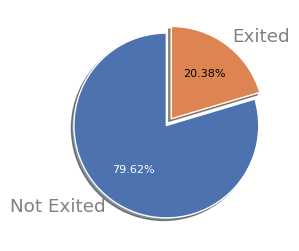

In [ ]:
values = df.Exited.value_counts()
labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

There is a class imbalance as only 20% of this dataset did exit the bank while the rest of the dataset did not exit the bank

## **Second Step: Data Visualization**

Next, we are going to create a correlation matrix and visualize the data we have so that we can better explore our data

First, the correlation matrix

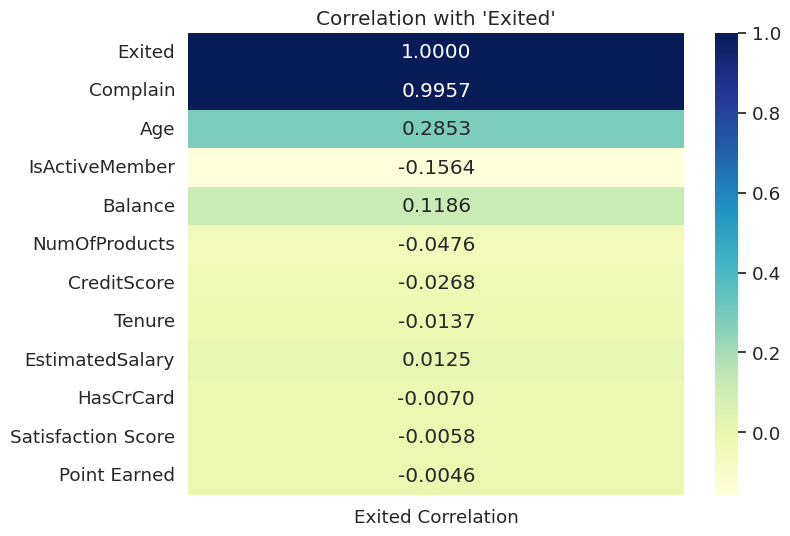

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr = df.corr(numeric_only=True)

# Filter for the "exited" column and sort by absolute value
exited_corr = corr["Exited"].sort_values(ascending=False, key=abs)

# Set up the figure size
plt.figure(figsize=(8, 6))  # Adjust width and height as needed

# Plot the heatmap for the "exited" correlations
sns.heatmap(
    exited_corr.to_frame(),
    annot=True,
    cmap='YlGnBu',
    fmt=".4f",
    cbar=True,
    xticklabels=["Exited Correlation"],
    yticklabels=exited_corr.index
)

# Show the plot
plt.title("Correlation with 'Exited'")
plt.show()


Based on this correlation matrix, the following is shown:

1. There is an extremely high positive correlation with complain, and that means that almost everyone who complained exited
2. There is a high positive correalation with age, meaning that the older people got, the more likely they exited
3. There a positive correlation between age and exited, meaning that the older people got, the more likely they'll exit.
4. There is a slight positive relationship between balance and Exited which showss that the higher the balance (the more a person has in his/her account), the more likely they will exit
5. There is a negative correlation between Exited and isactive memeber which shows that the less the user is active, the more likely they will exit
6. There is a slight negative correlation between exited and numofproducts meaning that the more products customer has with the bank, the less likely he/she will exit
7. There is a slight negative relationship between credit score and exited meaning that the higher the credit score, the less likely a customer will exit
8. There is a slight negative relationship between between tenure and exited. The more a person spends being a customer of the bank, the less likely he/she will churn/exit
9. There is a slight positive relationship between estimated salary and exited. The higher a person's salary, the more likely they will exit the bank.
10. There is almost no correlation (very very weak negative correlation which makes it irrelevant) between hasCrCard, satisfaction score, and points earned. This goes to show that those factors might not necessarily affect exit/churn rates

<ipython-input-166-6762bb984fd0>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x=column, y='Exited', data=df, palette='viridis')
<ipython-input-166-6762bb984fd0>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)
<ipython-input-166-6762bb984fd0>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x=column, y='Exited', data=df, palette='viridis')
<ipython-input-166-6762bb984fd0>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(),

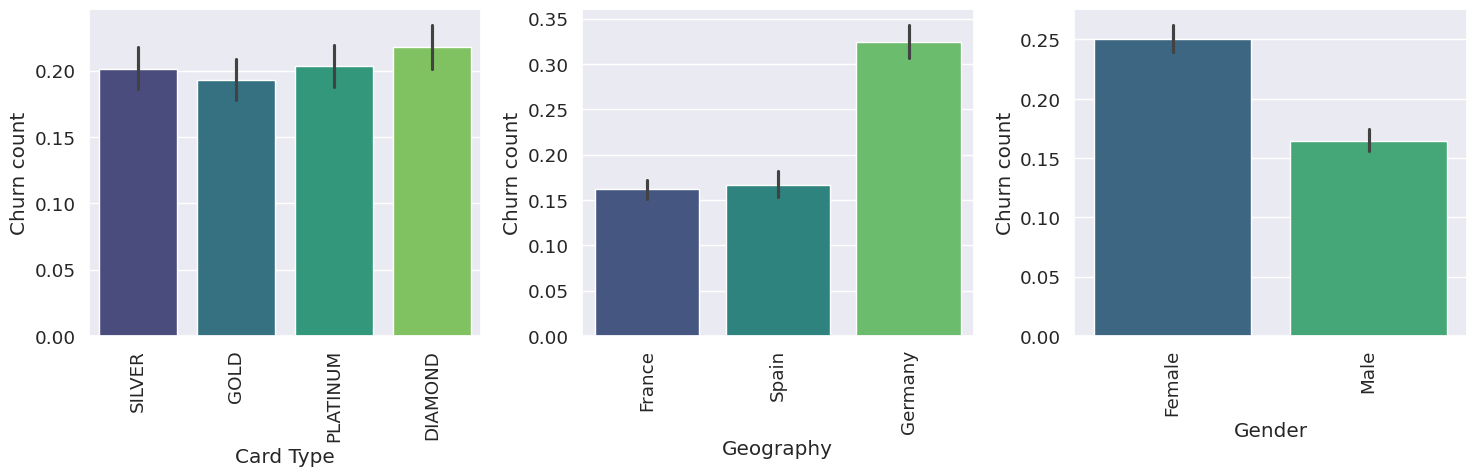

In [ ]:
import math

categorical_features = []
categorical_features.append('Card Type')
for column in df.columns:
    if df[column].dtype == object:
        categorical_features.append(column)


# Plotting every feature average in relation to the "target"
sns.set(font_scale=1.2)

# Calculate the number of rows and columns for the grid based on the number of categorical features
n_features = len(categorical_features)
n_cols = 3  # You can set this to the number of columns you want
n_rows = math.ceil(n_features / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 5))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    g = sns.barplot(x=column, y='Exited', data=df, palette='viridis')
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Churn count')
    plt.xlabel(f'{column}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Based on the visualizations above, Diamond card types were most likely to churn then Platinum, then silver, then Gold. In addition to that, Germans were more likely to churn than the French and Spain clients. Females are more likely to churn than males.

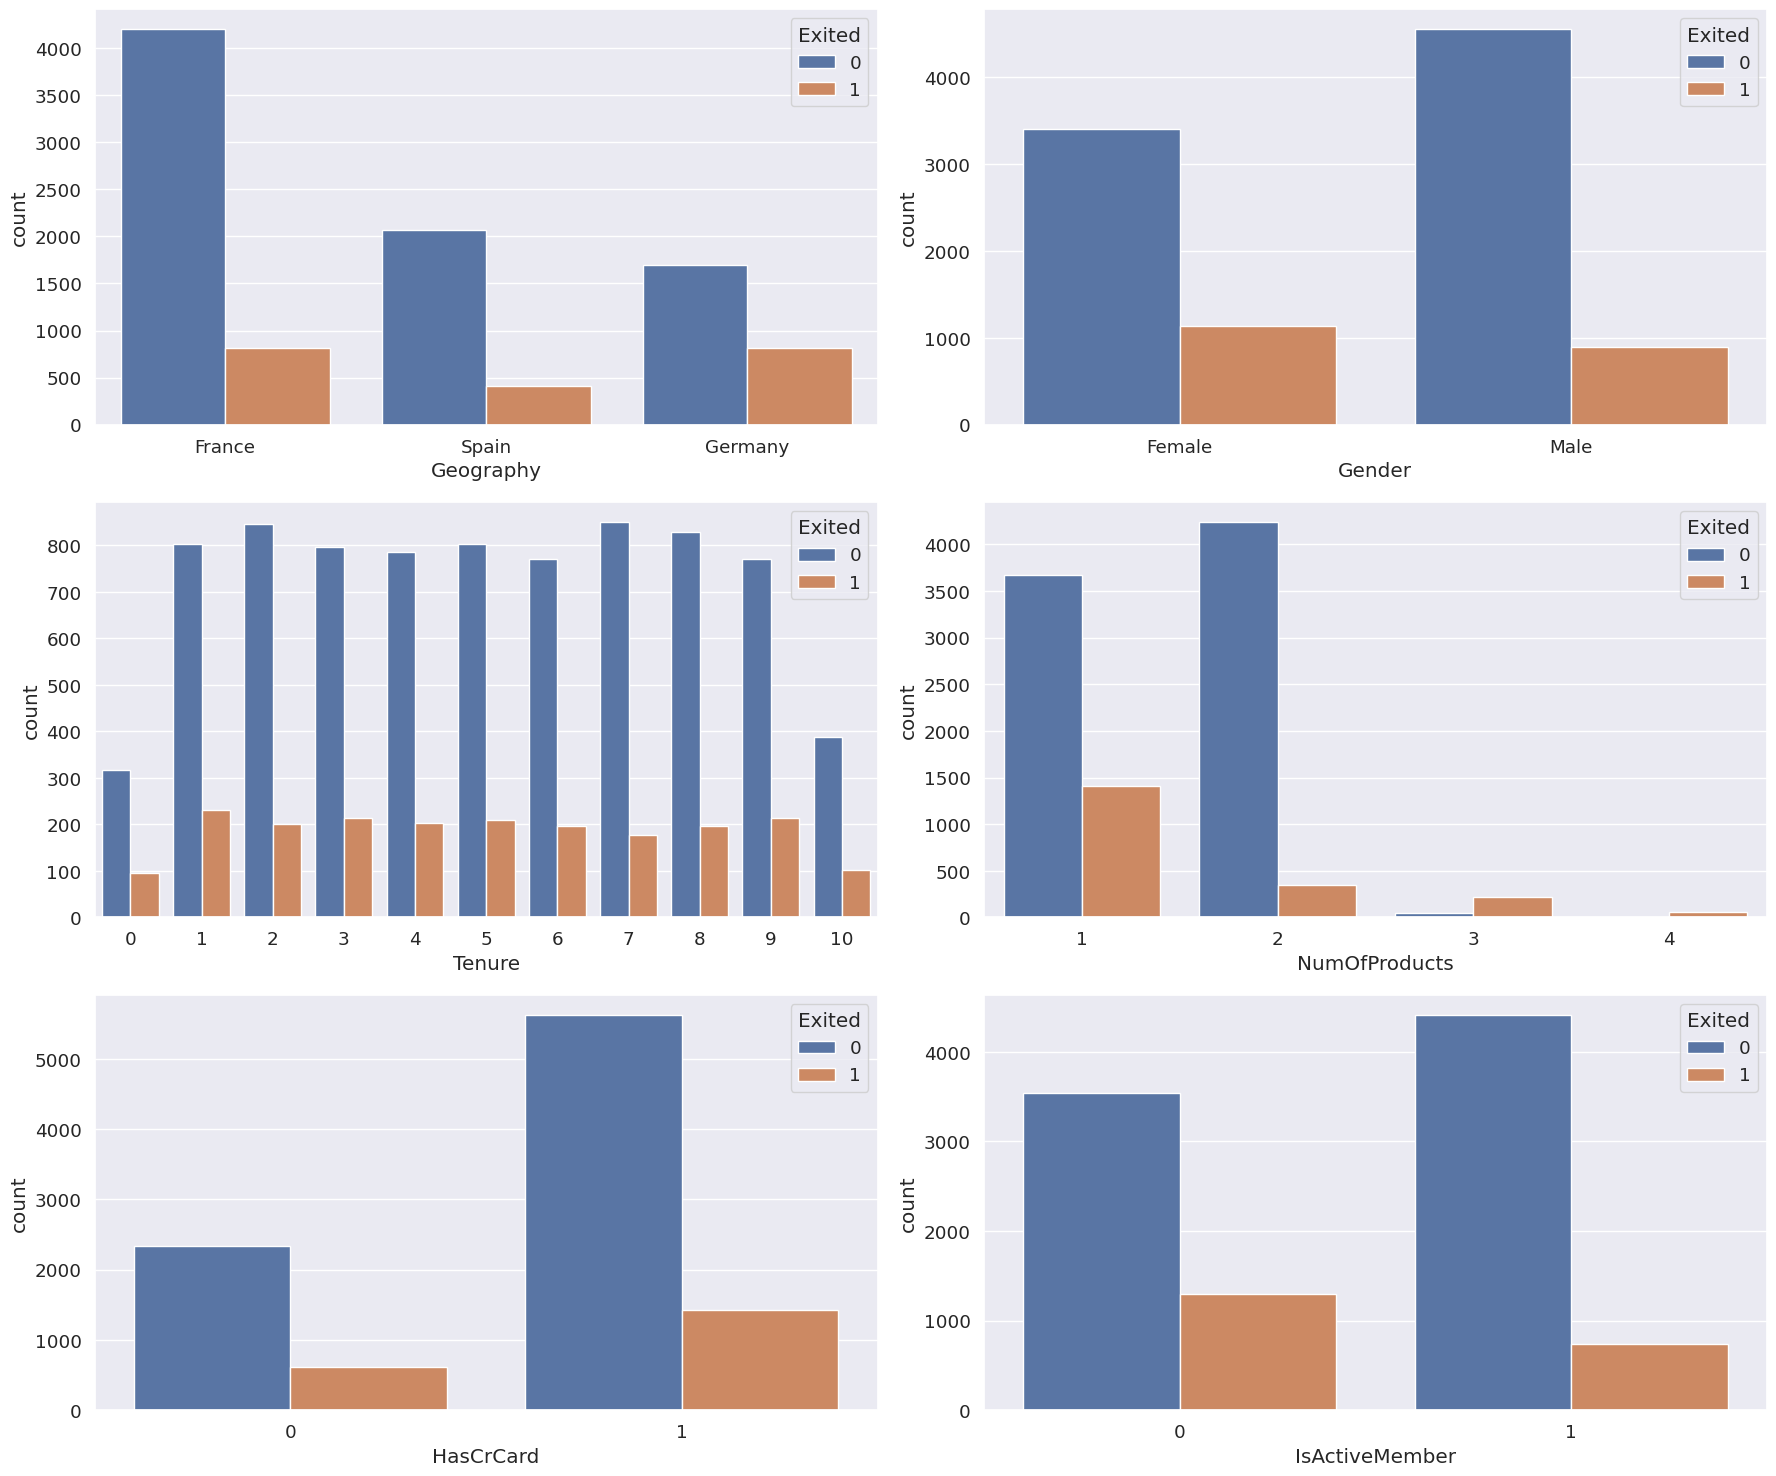

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(18, 15))

sns.countplot(x='Geography', hue='Exited', data=df, ax=ax[0, 0])  # Use ax[0, 0]
sns.countplot(x='Gender', hue='Exited', data=df, ax=ax[0, 1])
sns.countplot(x='Tenure', hue='Exited', data=df, ax=ax[1, 0])
sns.countplot(x='NumOfProducts', hue='Exited', data=df, ax=ax[1, 1])
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=ax[2, 0])
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=ax[2, 1])




plt.tight_layout()
plt.show()


This visualization shows the following observations:
1. Even though the half of the dataset is composed of French clients, Germans has a higher ratio of exiting than the French
2. Even though males make up a higher percentage of the dataset, females have a higher ratio of exiting
3. People are more like to churn/exit within the first to nineth year of tenure. Churn rates decrease before the first year and after the ninth year
4. Most customers bought one or two products, however, most of the customers who exited bought only one product, so this might be due to dissatisfaction with the service. Those who bought 3 products mostly exited.
5. Most people who churned did not have credit cards; however, according to the correlation matrix, it was a very weak negative correlation, so it might be a coincidence as most of the dataset does not have credit cards
6. Those who are not active members are more likely to churn


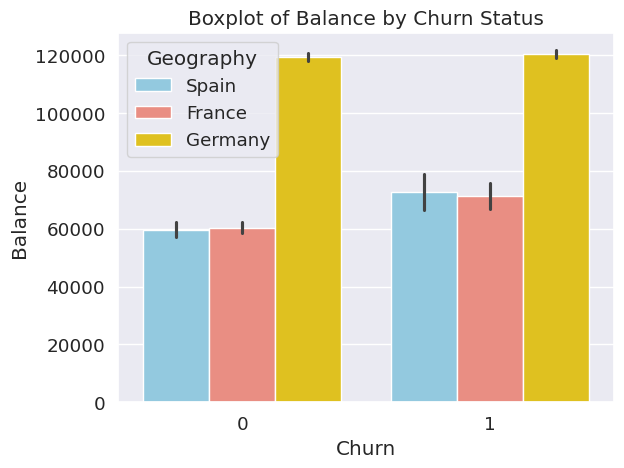

In [ ]:
sns.barplot(data=df, x='Exited', y='Balance' , hue='Geography', palette=['skyblue', 'salmon','gold'])
plt.xlabel('Churn')
plt.ylabel('Balance')
plt.title('Boxplot of Balance by Churn Status')
plt.show()


Based on this visualization, we can see that compared to the other countries, Germany has the highest balance. This shows that Germans customers tend to have the highest amount of money in their bank accounts. In addition to that, this shows positive correlation between balance and churn as the customers who churned had higher balances.

This shows that the bank is losing customers who are having a lot of money.

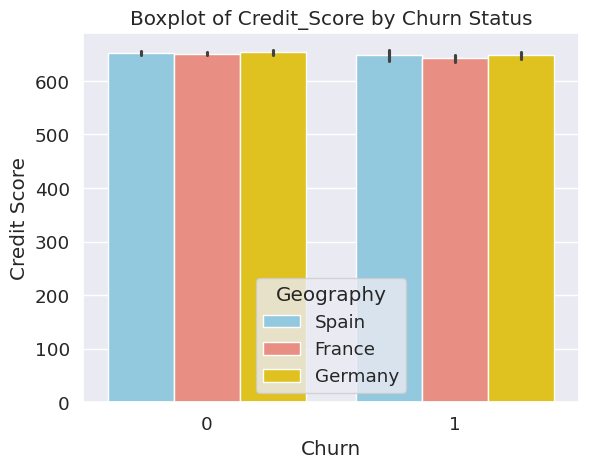

In [ ]:
sns.barplot(data=df, x='Exited', y='CreditScore' , hue='Geography', palette=['skyblue', 'salmon','gold'])
plt.xlabel('Churn')
plt.ylabel('Credit Score')
plt.title('Boxplot of Credit_Score by Churn Status')
plt.show()


This shows that despite the Germans having the most balance out of all the countries, they still manage to keep really good credit scores. It shows that the issue is not due to Germans being irresponsible

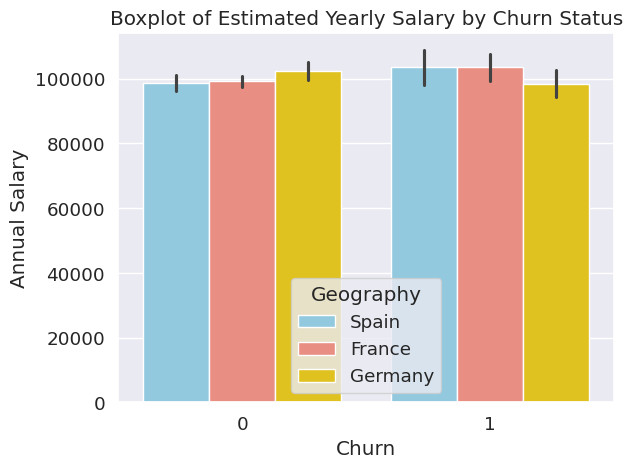

In [ ]:
sns.barplot(data=df, x='Exited', y='EstimatedSalary' , hue='Geography', palette=['skyblue', 'salmon','gold'])
plt.xlabel('Churn')
plt.ylabel('Annual Salary')
plt.title('Boxplot of Estimated Yearly Salary by Churn Status')
plt.show()


This graph shows that there is a slight positive relationship between churn and estimated salary as the average salary of the French and Spanish customers who churned was higher than the average of those who do not. However, German customers show the opposite relationship. The average salary of the German customers who churned was lower than those who did not churn.

<ipython-input-171-ee5b749f7a6f>:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(data=df, x='Exited', y='Point Earned' , hue='Exited', palette=['skyblue', 'salmon','gold'])


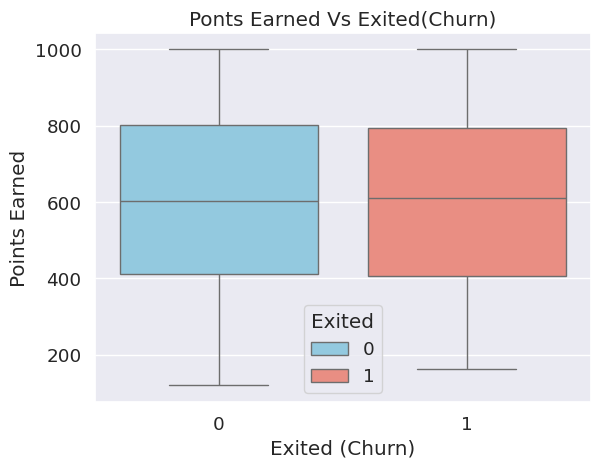

In [ ]:
sns.boxplot(data=df, x='Exited', y='Point Earned' , hue='Exited', palette=['skyblue', 'salmon','gold'])
plt.xlabel('Exited (Churn)')
plt.ylabel('Points Earned')
plt.title('Ponts Earned Vs Exited(Churn)')
plt.show()

This shows that the distribution of points earned for those who churned and those who did not churn was almost the same, which shows almost no correlation

Let's check the age distribution as well

<ipython-input-172-818e43de7915>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Exited', y='Age', palette=['skyblue', 'salmon'])


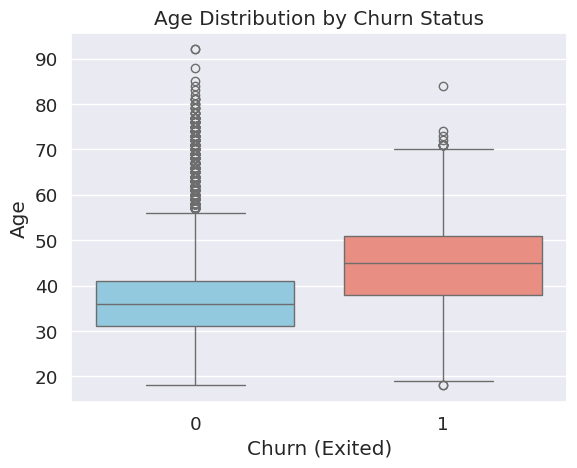

In [ ]:
sns.boxplot(data=df, x='Exited', y='Age', palette=['skyblue', 'salmon'])
plt.xlabel('Churn (Exited)')  # Label for the churn classes
plt.ylabel('Age')  # Label for Age
plt.title('Age Distribution by Churn Status')  # Plot title
plt.show()


This shows that the median of people who exit the serivce are approximately 45-year old. 25% of the people who did churn are 40 years old or younger. 75% of people who did churn are 50 years old or younger. Compared to that, 75% of people who did not churn are 40 years old or younger, median is 35 years old, and 25% is approximately 32 years old

<ipython-input-173-3984e26ed00d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Exited', y='Balance', palette=['skyblue', 'salmon'])


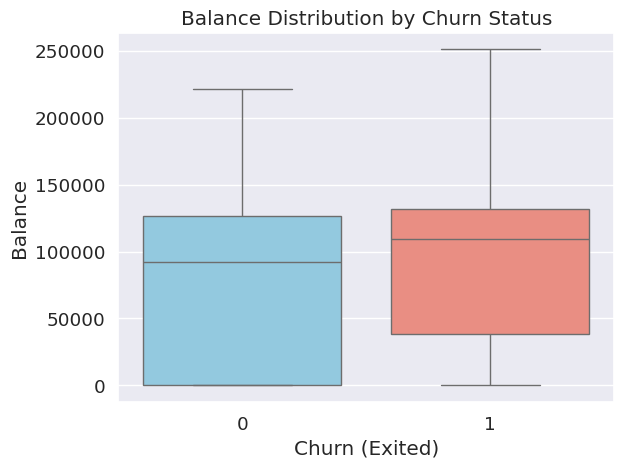

In [ ]:
sns.boxplot(data=df, x='Exited', y='Balance', palette=['skyblue', 'salmon'])
plt.xlabel('Churn (Exited)')  # Label for the churn classes
plt.ylabel('Balance')  # Label for Age
plt.title('Balance Distribution by Churn Status')  # Plot title
plt.show()

Based on the distribution above, those who churn/exit the bank have higher balances (higher max whisker, higher median, and higher quartiles) than those who did not churn. Those who did not churn probably are those who are in need of the money and cannot afford to exit.

<ipython-input-174-32592992e310>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Exited', y='CreditScore', palette=['skyblue', 'salmon'])


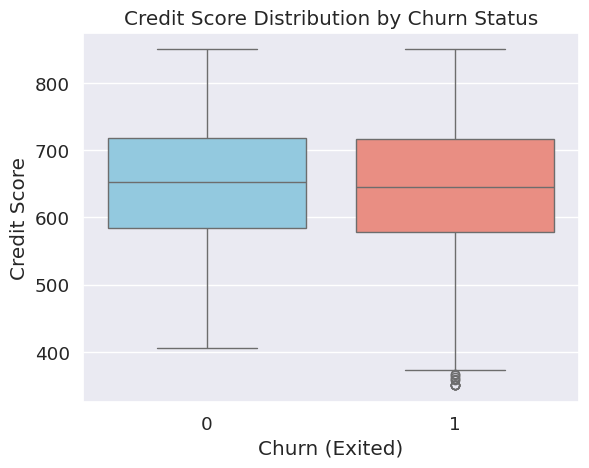

In [ ]:
sns.boxplot(data=df, x='Exited', y='CreditScore', palette=['skyblue', 'salmon'])
plt.xlabel('Churn (Exited)')  # Label for the churn classes
plt.ylabel('Credit Score')  # Label for Age
plt.title('Credit Score Distribution by Churn Status')  # Plot title
plt.show()

There is a very slight difference in the distribution of credit score for those who churned compared to those who did not churn. Those who churned had a slightly lower credit score (by 20-30) points

<ipython-input-175-2fa911bc344e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Exited', y='Satisfaction Score', palette=['skyblue', 'salmon'])


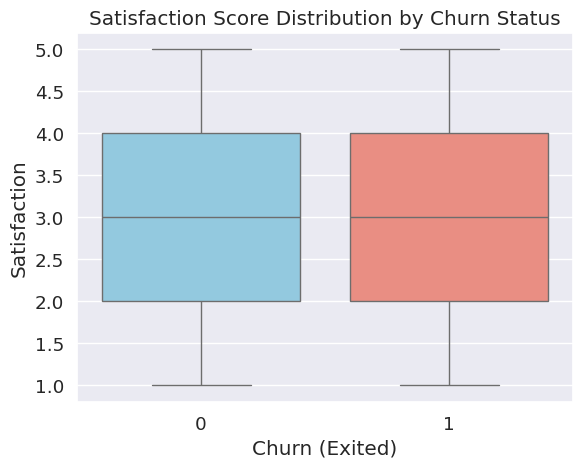

In [ ]:
sns.boxplot(data=df, x='Exited', y='Satisfaction Score', palette=['skyblue', 'salmon'])
plt.xlabel('Churn (Exited)')  # Label for the churn classes
plt.ylabel('Satisfaction')  # Label for Age
plt.title('Satisfaction Score Distribution by Churn Status')  # Plot title
plt.show()


The satisfaction score distribution for those who churned and those who did not churn were almost identical, so satisfaction score shows no correlation with exit.

<ipython-input-176-a5339473d8f6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Exited', y='HasCrCard', palette=['skyblue', 'salmon'])


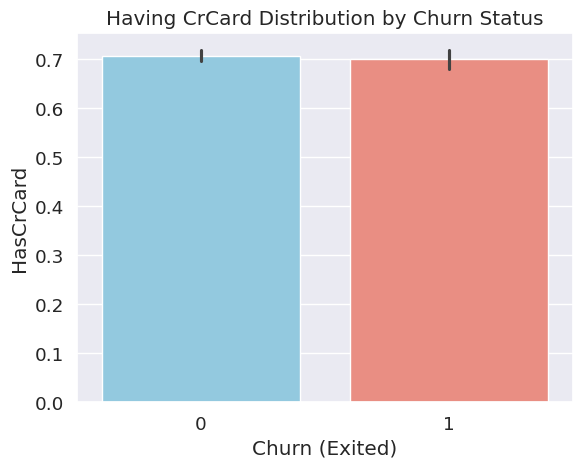

In [ ]:
sns.barplot(data=df, x='Exited', y='HasCrCard', palette=['skyblue', 'salmon'])
plt.xlabel('Churn (Exited)')  # Label for the churn classes
plt.ylabel('HasCrCard')  # Label for Age
plt.title('Having CrCard Distribution by Churn Status')  # Plot title
plt.show()

This visual shows that regardless of those who churned or did not churn, 70% of each had credit cards; hence, credit cards and churn show no correlation as well.

 Customer who exit have more money and their balances, bought only one or two products with the their card, and their credit score is slightly lower than those who did not churn. They also tend to be older in age. Maybe the bank does not offer enough services or average services, so customers go to services that offer higher quality services

## **Third Step: Feature Selection and Preparation**

Based on the data visualizations above, the following will be dropped:
Point Earned,Satisfaction Score, and HasCrCard as both almost those attributes showed no difference in the churn/exit probability. In addition to that, we previously dropped row number, Surname, and CustomerID, since we do not need them and they will cause the machine learning to overfit. Complain will be also dropped as there is an extremely high correlation between Churn and Complain and it will cause the machine to overfit. Besides, we need the machine to know signs of churning before a complain.

The selected features are:
1. Gender
2. Geography
3. Card Type
4. Tenure
5. Age
6. Balance
7. Estimated Salary
8. Credit Score
9. Num of Products
10. IsActiveMember


The Exited will act as our output class since we do want to predict if customer will churn while rows of data without the churn will act as the input.

We will start to prepare our data through encoding and dropping

In [ ]:
df_og=df.copy()
df_og.drop(['Point Earned', 'Satisfaction Score', 'HasCrCard','Complain'], axis=1, inplace=True)
df_og.drop(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Card Type
0,619,France,Female,42,2,0.00,1,1,101348.88,1,DIAMOND
1,608,Spain,Female,41,1,83807.86,1,1,112542.58,0,DIAMOND
2,502,France,Female,42,8,159660.80,3,0,113931.57,1,DIAMOND
3,699,France,Female,39,1,0.00,2,0,93826.63,0,GOLD
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0,GOLD
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,0,96270.64,0,DIAMOND
9996,516,France,Male,35,10,57369.61,1,1,101699.77,0,PLATINUM
9997,709,France,Female,36,7,0.00,1,1,42085.58,1,SILVER
9998,772,Germany,Male,42,3,75075.31,2,0,92888.52,1,GOLD


Next, we will encode all the categorical data

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
label_encoder_gender = LabelEncoder()
df_og['Gender'] = label_encoder_gender.fit_transform(df_og['Gender'])
df_og.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Card Type
0,619,France,0,42,2,0.00,1,1,101348.88,1,DIAMOND
1,608,Spain,0,41,1,83807.86,1,1,112542.58,0,DIAMOND
2,502,France,0,42,8,159660.80,3,0,113931.57,1,DIAMOND
3,699,France,0,39,1,0.00,2,0,93826.63,0,GOLD
4,850,Spain,0,43,2,125510.82,1,1,79084.10,0,GOLD
5,645,Spain,1,44,8,113755.78,2,0,149756.71,1,DIAMOND
6,822,France,1,50,7,0.00,2,1,10062.80,0,SILVER
7,376,Germany,0,29,4,115046.74,4,0,119346.88,1,DIAMOND
8,501,France,1,44,4,142051.07,2,1,74940.50,0,GOLD
9,684,France,1,27,2,134603.88,1,1,71725.73,0,GOLD


Female equals 0 while Male equals 1

We will need to one hot encode card type as it is ordinal and we can use their cat code

In [ ]:
df_og['Card Type'] = df_og['Card Type'].cat.codes
df_og.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Card Type
0,619,France,0,42,2,0.00,1,1,101348.88,1,3
1,608,Spain,0,41,1,83807.86,1,1,112542.58,0,3
2,502,France,0,42,8,159660.80,3,0,113931.57,1,3
3,699,France,0,39,1,0.00,2,0,93826.63,0,1
4,850,Spain,0,43,2,125510.82,1,1,79084.10,0,1
5,645,Spain,1,44,8,113755.78,2,0,149756.71,1,3
6,822,France,1,50,7,0.00,2,1,10062.80,0,0
7,376,Germany,0,29,4,115046.74,4,0,119346.88,1,3
8,501,France,1,44,4,142051.07,2,1,74940.50,0,1
9,684,France,1,27,2,134603.88,1,1,71725.73,0,1


Last but not least, we need to one hot encode the Geography as it is nominal categorical data

In [ ]:
onehot_encoder_geography = pd.get_dummies(df_og['Geography'], drop_first=True)  # Dummy variables for Geography
df_og = pd.concat([df_og, onehot_encoder_geography], axis=1)
df_og.drop('Geography', axis=1, inplace=True)


In [ ]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


Last step is dividing the data into training and testing sets and scaling/normalizing them

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

data=df_og.copy()
X = data.drop(['Exited'], axis=1, errors='ignore')  # Replace 'CustomerId' and 'Churn' with actual column names
y = data['Exited']  # Replace 'Churn' with your target column

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Building the ANN Model**

Firstly, there are several types of neural networks:

1. Artitifcial Neural Network (ANN):

It is the most known type of neural networks. It is composed of an input layer, one or more hidden layers, and an output layer. Each layer has activation functions such as relu and sigmoid. It is usually used for pattern recognition, classification, and regression

2. Convolutional Neural Network (CNN):

it is a type of ANN that is specialized in processing grid-like structures such as images and videos. It extracts spatial features (pixels) through convolutional layers, reduces their dimensions through pooling layers, and has other hidden layers and output layer. It is usually applied for image recognition, and computer vision
3. Recurrent Neural Network (RNN):

A type of ANN which is used to process sequential (time-series) data by allowing the output from one step is used as input for the next step so information from previous steps are retained. This is done through the hidden state which acts as a memory that captures important information. It is usually applied in Natural Language Processing, speech recognition, and time-series predictions such as stock predictions

4. Long Short Term Memory (LSTM):

A special and upgraded kind of RNN that works to solve the issues found in RNN by applying gates to control the flow of information. Unlike RNN, LSTM can be used for long term predictions. Some applications include video analysis, text generation, and machine translation



Since we are solving a classification problem (a customer will churn or not), and our data is not sequential, we choose ANN. We created our ANN of the following layers:

1. Input and first hidden layer:

We used the activation function of Relu (also known as Rectified Linear Unit) which is extremely simple. If the value is greater than 0, then it is passed as it is, and if the value is less than 0, then it is passed as 0. That is crucial as passing negative numbers makes it harder for the machine to learn. Hence, relu is used. Relu has also cheaper computation compared to the others.

2. Second hidden layer:
We used a second layer in order to aid in capturing the less obvious and weaker correlations. We used relu for the same reasons stated in the first layer. It is computationally efficient and does not pass negative numbers which makes the next layer learn better

3. Output layer:
We used a sigmoid activation function as sigmoids are usually used for classification problems and logistic regression. Our output is a binary class, hence, sigmoid was the best suited activation layer

Dropouts are used in order to reduce overfitting by making the layer use different neurons for each training iteration

In [ ]:
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))  # Regularization

# Second hidden layer
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=25, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Predict on test data
y_pred = (model.predict(X_test) > 0.5).astype(int)

Epoch 1/23


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7445 - loss: 0.5507 - val_accuracy: 0.8238 - val_loss: 0.4174
Epoch 2/23
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8112 - loss: 0.4380 - val_accuracy: 0.8400 - val_loss: 0.3913
Epoch 3/23
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8309 - loss: 0.4161 - val_accuracy: 0.8475 - val_loss: 0.3731
Epoch 4/23
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8392 - loss: 0.4002 - val_accuracy: 0.8494 - val_loss: 0.3609
Epoch 5/23
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8469 - loss: 0.3792 - val_accuracy: 0.8537 - val_loss: 0.3536
Epoch 6/23
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8472 - loss: 0.3674 - val_accuracy: 0.8581 - val_loss: 0.3498
Epoch 7/23
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8484 - loss: 0.3630 - val_accuracy: 0.8556 - val_loss: 0.3497
Epoch 8/23
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8533 - loss: 0.3544 - val_accuracy: 0.8569 - val_

In [ ]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8646 - loss: 0.3336


[0.3377317190170288, 0.8615000247955322]

This training of the ANN had an accuracy of 86.15% which is considered high; however, we have a class imbalance, so we will need to use a confusion matrix to see the precision and recall for each class.

As for the loss, the loss function shows the distance between the observed values and the predicted values. For classification, that is measured through cross entropy. The loss in our dataset had an average of 33.58% which is fine as the accuracy is considerably high.

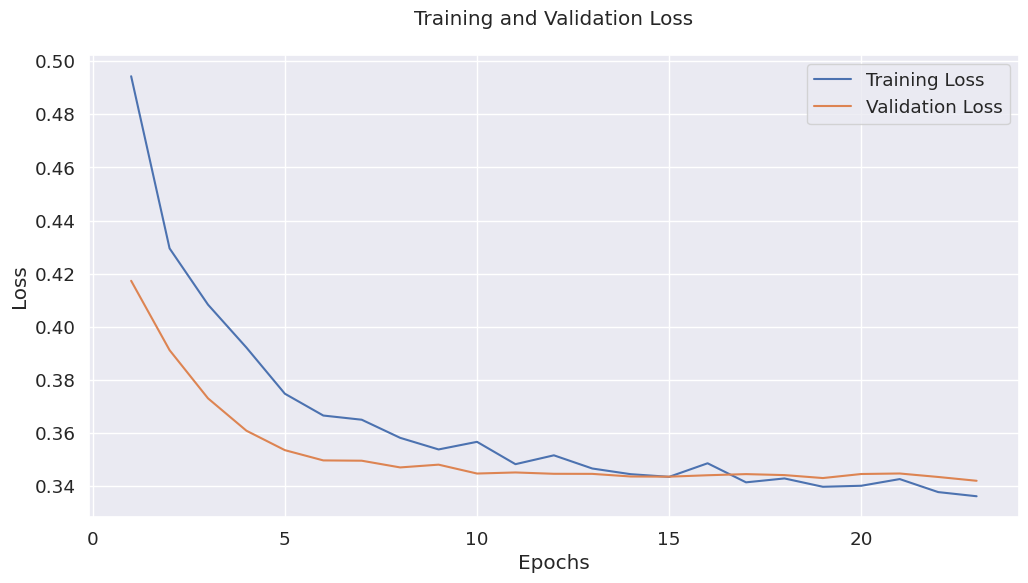

In [ ]:
plt.figure(figsize = (12, 6))

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(1, 24)
sns.lineplot(x=epoch, y=train_loss, label = 'Training Loss')
sns.lineplot(x=epoch, y=val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

This shows that the validation loss and training loss are converging well; however, if more epochs were done then there would have been an overfitting issue as the validation loss was starting to become higher than training loss

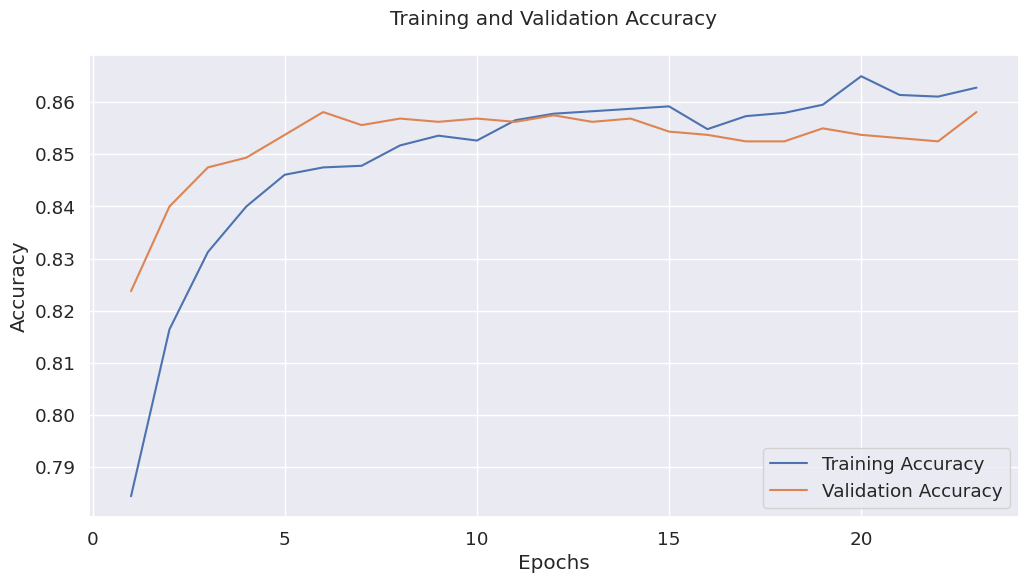

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract accuracy data from the history object
train_accuracy = history.history['accuracy']  # Use 'acc' if using older Keras versions
val_accuracy = history.history['val_accuracy']

# Create a range of epochs (1 to the number of training epochs)
epochs = range(1, 24)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
sns.lineplot(x=epochs, y=train_accuracy, label='Training Accuracy')
sns.lineplot(x=epochs, y=val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This shows that there is almost no overfitting as the gap between training accuracy and validation accuracy is small. If the epochs were bigger, then the gap would have gotten bigger showing a larger gap and leading to overfitting

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix:
[[1529   78]
 [ 199  194]]


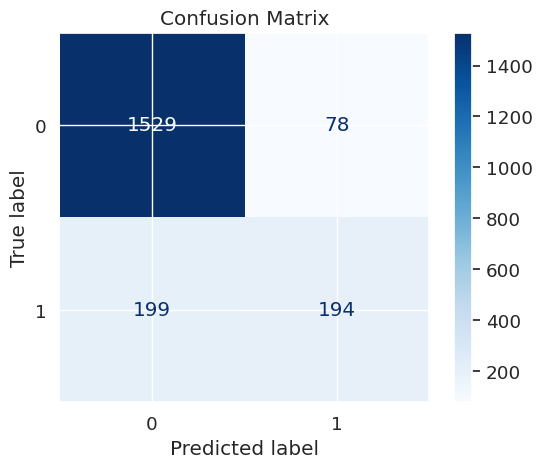

Classification Report:
              precision    recall  f1-score   support

   Not Churn       0.88      0.95      0.92      1607
       Churn       0.71      0.49      0.58       393

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test set (output probabilities)
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions using a threshold (default: 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optional: Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Churn', 'Churn']))


The following are important terms to know:
1. Positive class: the class we want to predict on
2. Negative class: the other class
3. True positive: the positive class in the dataset that was predicted correctly as positive
4. True negative: the negative class in the dataset that was predicted correctly as negative
5. False positive: points in the dataset that were predicted as positive when they were actually negative
6. False negative: points in the dataset that were predicted as the negative class when they were actually positive .

The confusion matrix is evaluated through the following matrices:
1. Precision: out of all the positive class predictions the machine predicted, how many of those predictions were actually correct. It works on reducing false positives. It is calculated as (TP/TP+FP)
2. Recall: out of all the positives found in the dataset, how many were actually predicted. It works on reducing false negatives. It is calculated as (TP/TP+FN).
3. F1-Score: it mixes both the recall and precision in order to find a good harmony between the false positives and false negatives.

A. The Churn Class performance as the positive class:
- In our case, we selected the churn class as our positive class as we wanted to know what makes customers churn so we can work on reducing it.
- For its precision, it is 71% meaning that out of all the data points that it predicted as positive, it predicted 71% of them right. That does mean that the other 29% are false positives. Considering that there a significant class imbalance, 71% precision is a high score
- For its recall, it is 49% meaning that it was only able to detect 49% of the churners correctly, and that is not a good score really.
-  F1-Score is 58% meaning that the tradeoff between FP and FN is 58% which is a bit low
-This model has an average performance when it comes to predicting churners

B. The Not Churn class performance if it was the positive class:
- Some loyalty programs care for which customers are more likely not to churn, so we calculated the performance for that class as well
- The precision was 88% meaning that out of all the not churning predictions it made, 88% percent of them were right. That is extremely high. This also means that there is low false positives (if not churn was the positive class)
- The recall was extremely high as it was able to correctly detect 95% of all not churners. Meaning only 5% was false negative (in case not churn was the positive class).
- The f1-score is 92% which is an extremely good tradeoff.
- This model performs extremely well for the not churn class

## **Conclusion:**



In this experiment, we were able to conclude that using the ANN lead to a high accuracy overall, 86.15%. However, this model is better at predicting who will not churn compared to who will churn. The f1-score of the Not churn was 92% compared to 58% for those who will churn. However, precision rate of 71% for the churn class is a high for churn problems especially with a class imabalance that high. Hence, if the bank is trying to predict who will not churn, it is an excellent tool. However, if it is trying to predict which customer will churn, caution should be taken while using this model. While it 71% of its churn predictions are actually correct, it miscorrectly predicts 199 out of 393 churners as customers who stayed which is almost 50% wrong.

Some weaknesses in our dataset might include not tracking how many customer support calls took place and whether the customer complaint was solved or not. Doing so might have better helped with understanding the reason behind the churn of the customers. Adding more countries from different continents might also be more beneficial for international banks.